# Assignment3: Data Visualization using Titanic Dataset.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


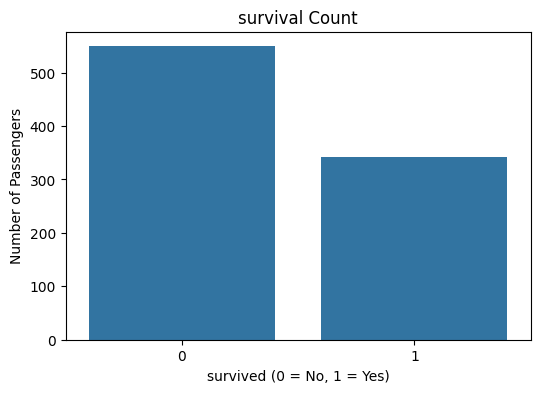

In [5]:
# Survival Count (Bar Plot)

plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df)
plt.title("survival Count")
plt.xlabel("survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()


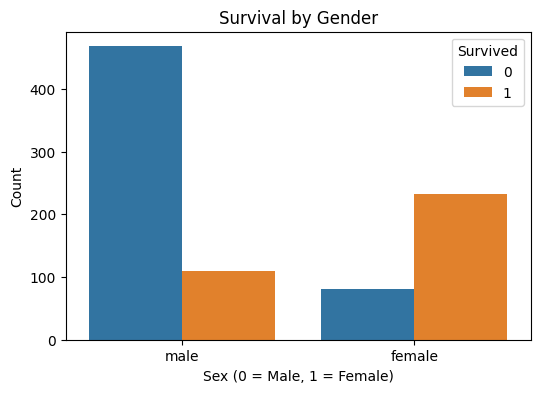

In [6]:
# Gender vs Survival

plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()


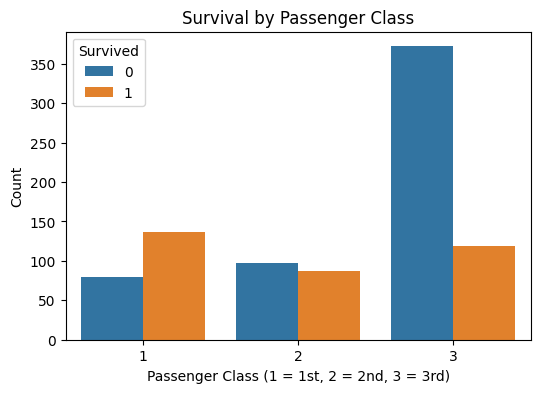

In [7]:
# Passenger Class vs Survival

plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()

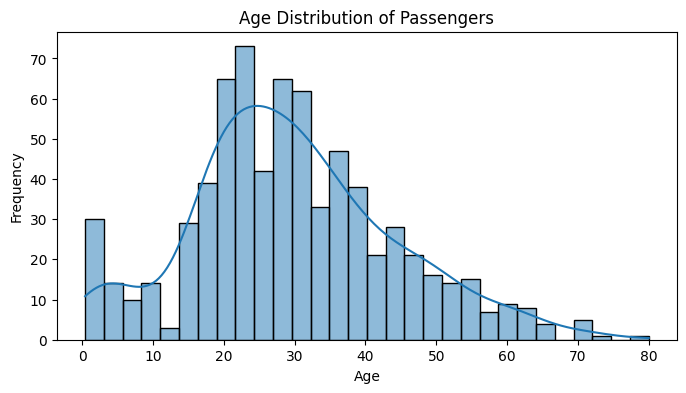

In [8]:
# Age Distribution(Histogram)

plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


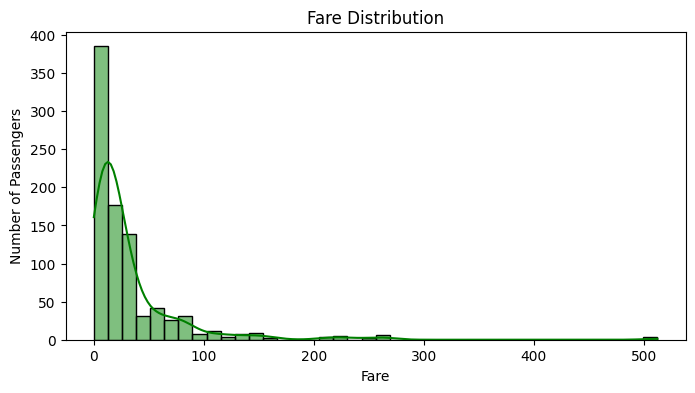

In [9]:
# Fare Distribution

plt.figure(figsize=(8, 4))
sns.histplot(df['fare'], kde=True, bins=40, color='green')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.show()

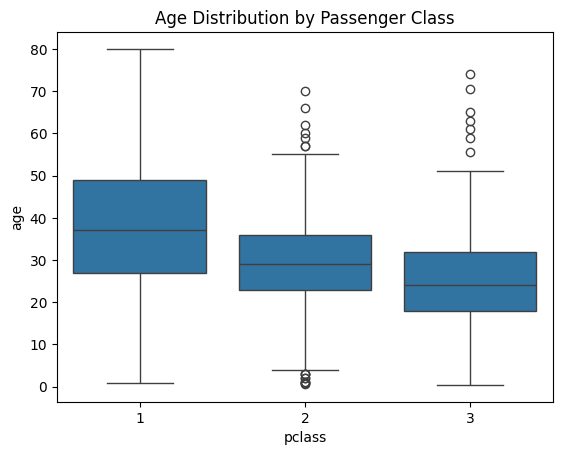

In [10]:
# Boxplot: Age by Class

sns.boxplot(x='pclass', y='age', data=df)
plt.title("Age Distribution by Passenger Class")
plt.show()


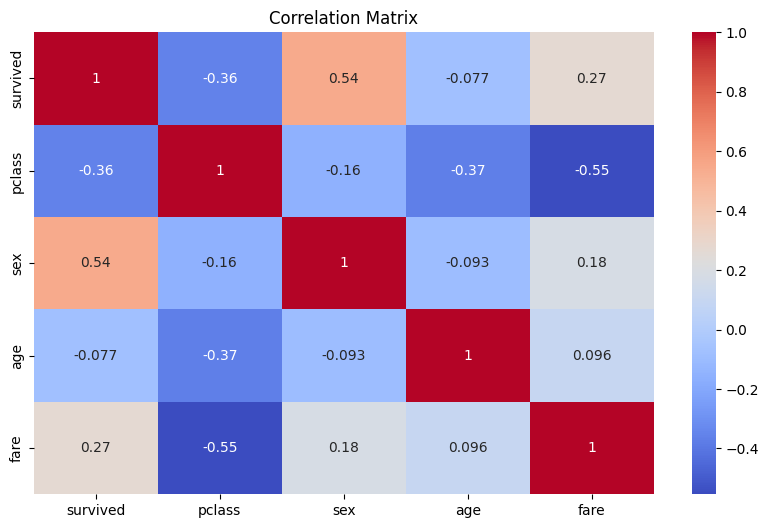

In [11]:
# Heatmap of Correlations

df_encoded = df[['survived', 'pclass', 'sex', 'age', 'fare']].copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 0, 'female': 1})

df_encoded = df_encoded.dropna()
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
